# Evaluate the model

In [37]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
import os
import sys
from stable_baselines3 import A2C
from pathlib import Path

# Find the root directory by traversing up the directory tree
def find_project_root(current_path):
    if os.path.exists(os.path.join(current_path, "README.md")):
        return current_path
    parent_path = os.path.dirname(current_path)
    if parent_path == current_path:
        raise ValueError("Project root not found.")
    return find_project_root(parent_path)


current_dir = os.getcwd()
project_root = find_project_root(current_dir)
sys.path.append(str(project_root))
print(f"Project root: {project_root}")
from src.models.evaluate import evaluate_policy
from src.data.definitions import MODEL_PATH
from src.models.bank_env import BankEnv
from src.visualization import visualize
# flake8: noqa  # Disable Flake8 for the following block
import gymnasium as gym

Project root: f:\OneDrive\Documents\GitHub\rl-alm


In [14]:
env_id = "bank-v3"
model_name = "A2C_V_3000000.zip"

In [15]:
gym.register(id=env_id, entry_point=BankEnv, max_episode_steps=60)    

f:\OneDrive\Documents\GitHub\rl-alm\rl-alm\lib\site-packages\gymnasium\envs\registration.py:693: UserWarning: WARN: Overriding environment bank-v3 already in registry.
  logger.warn(f"Overriding environment {new_spec.id} already in registry.")


2023-09-27 14:31:55.121 | INFO     | src.data.dataset:read_data:46 - reading interest data from ESW.
2023-09-27 14:31:56.442 | INFO     | src.data.dataset:read_data:46 - reading zerocurve data from ESW.


Interest period:  (Timestamp('2010-06-01 00:00:00'), Timestamp('2023-06-01 00:00:00'))
Zerocurve period:  (Timestamp('2010-06-01 00:00:00'), Timestamp('2023-06-30 00:00:00'))


f:\OneDrive\Documents\GitHub\rl-alm\rl-alm\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
f:\OneDrive\Documents\GitHub\rl-alm\rl-alm\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
f:\OneDrive\Documents\GitHub\rl-alm\rl-alm\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
f:\OneDrive\Documents\GitHub\rl-alm\rl-alm\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. 

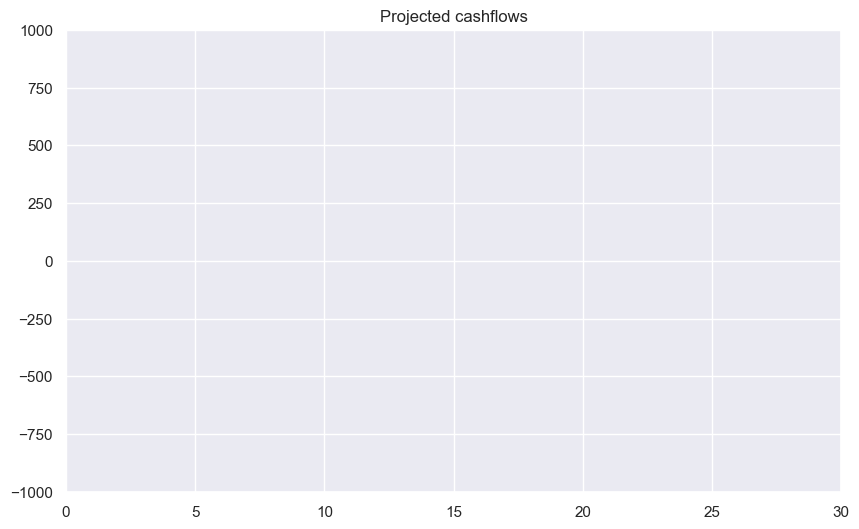

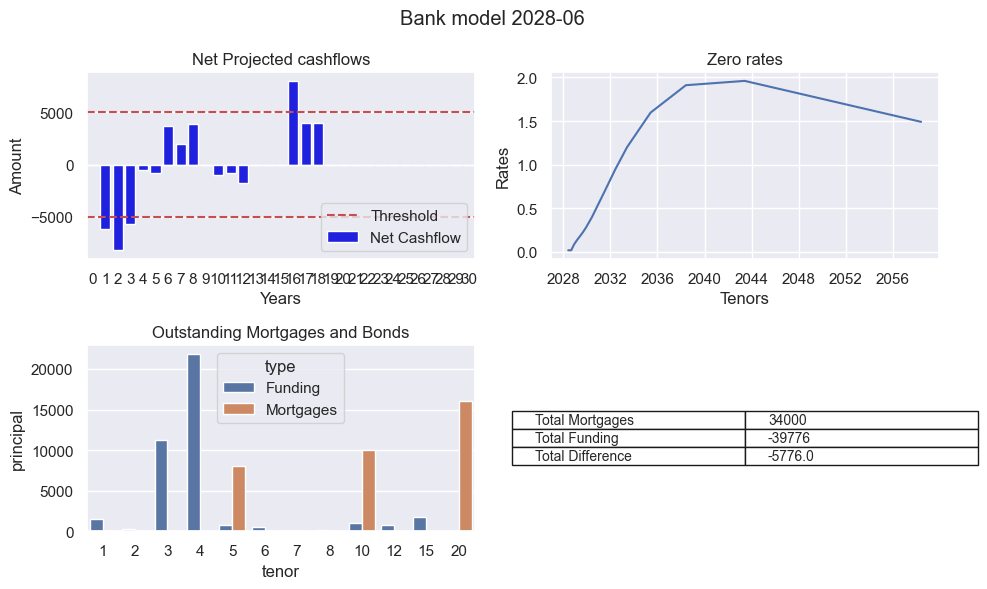

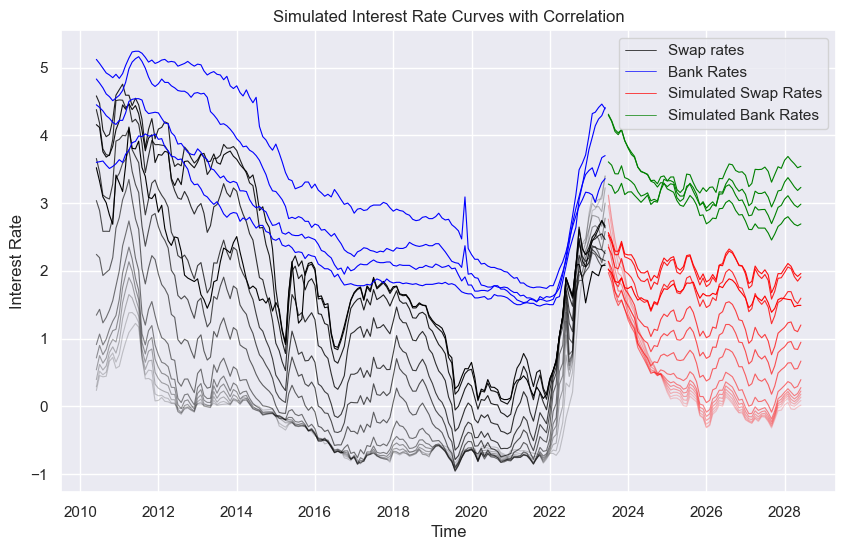

<Figure size 1000x600 with 0 Axes>

In [16]:
# Walk through the predictions from the trained model
env = gym.make(env_id, render_mode="human")
env = gym.wrappers.PassiveEnvChecker(env)
model = A2C.load(Path(MODEL_PATH, model_name), env=env)
env.set_render_output(model_name)
obs, info = env.reset()
score = 0
terminated = False
truncated = False
while not terminated and not truncated:
    action, _state = model.predict(obs)
    obs, reward, terminated, truncated, info = env.step(action)
    score = score + reward
    # env.render()
env.plot()
env.close()

In [34]:
mean_reward, iqr, es, rewards = evaluate_policy(model=model, env= env, n_eval_episodes=500, conf_level=0.95)


In [35]:
print(f"number of episodes = {len(rewards)}, mean_reward={mean_reward:.2f} Expected Shortfall={es:.2f} Interquartile Range={iqr:.2f}")

number of episodes = 500, mean_reward=-25817.36 Expected Shortfall=-33595.20 Interquartile Range=4552.25


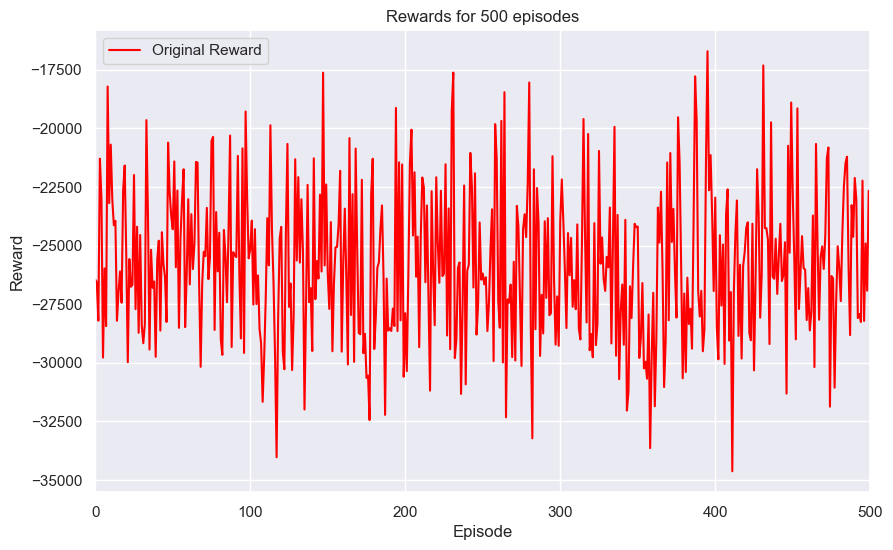

In [36]:
visualize.plot_rewards(rewards, interpolate_line=False)
 